# Project 1: Microsoft's Entry to the Film Industry
![mslogo](images/mslogo.jpg)

In [ ]:
# what do you expect to find from these data sets?

# Microsoft sees all the big companies creating original video content and they want to get in on the fun. 
# They have decided to create a new movie studio, but they don’t know anything about creating movies. 
# You are charged with exploring what types of films are currently doing the best at the box office. 
# You must then translate those findings into actionable insights that the head of Microsoft's 
# new movie studio can use to help decide what type of films to create.


## Overview

This project aims to analyze the types of movies that generates the most revenue. Factors such as the movie's ratings (PG, G, PG-13, etc.), number of votes for scores it received, as well as the average of the users' scores by genres were used to help determine which type(s) of movies Microsoft should create.  

### Business Problem

Microsoft does not have prior experience in the film industry, and needs to minimize the risk of entering a new industry. However, there are numerous genres of movies as well as the budgeting problem. This project aims to aid Microsoft by providing datas related to these problems.

## Data Understanding

Much of the analysis focuses on the movie's performance and popularity to its Motion Picture Association(MPA) rating and genre(s). It should be noted that movies containing multiple genres had their genres separated and given the same performence metrics.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

%matplotlib inline

In [2]:
imdb_title_basics_df=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_ratings_df=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
rt_movie_info_df=pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t', header=0)
tn_movie_budgets_df=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
# tmdb_movies_df=pd.read_csv('zippedData/tmdb.movies.csv.gz')
# movie_gross_df=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
#imdb_name_basics_df=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
#imdb_title_akas_df=pd.read_csv('zippedData/imdb.title.akas.csv.gz')
#imdb_title_crew_df=pd.read_csv('zippedData/imdb.title.crew.csv.gz')
#imdb_title_principals_df=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
#rt_reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz',sep='\t',header=0, encoding='latin-1')

In [61]:
imdb_title_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [62]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [63]:
rt_movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [65]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


## Data Preparation

### Data Cleaning

First, in order to find the average box office earnings for each genre, movies that do not have any values for box office is dropped. Using methods such as fillna with mean or mode is not used to capture the most accurate representation for each genre's box office earnings.

In [8]:
genre_boxoffice_df=rt_movie_info_df.copy()
genre_boxoffice_df=genre_boxoffice_df.dropna(axis=0,subset=['box_office']) 
#dropping movies that do not have box office values since this is what we're most interested at

Information regarding the synopsis or the movie studio is not needed, therefore, dropped. Also, because the 'box_office' column has a data type of an object, it is changed to int64 using astype in order to use the data in graphs.

In [9]:
new_rt_info_df=new_rt_info_df.drop(columns=['synopsis','studio'])
new_rt_info_df['box_office']=new_rt_info_df['box_office'].str.replace(',','').astype('int64')

### Merging Datasets

In order to be able to see both the movie title's name as well as its genres, imdb_title_ratings_df and imdb_title_basics_df are joined to create imdb_title_and_ratings_df. Here, the 'start_year' and 'runtime_minutes' are dropped as they are not necessary information.

In [3]:
imdb_title_and_ratings_df=imdb_title_ratings_df.join(imdb_title_basics_df.set_index('tconst'),on='tconst')
# made new df joining title of movie and average rating
imdb_title_and_ratings_df=imdb_title_and_ratings_df.drop(columns=['start_year','runtime_minutes']) 
#don't need start year and runtime minutes
imdb_title_and_ratings_df.head()

To create a dataset that contains the average of the average user ratings and the number of user votes, columns other than 'averagerating' and 'numvotes' are dropped and the genre column is set as the index in order to use the groupby function.

In [5]:
new_title_and_ratings_df=imdb_title_and_ratings_df.drop(columns=['tconst','primary_title','original_title'])
new_title_and_ratings_df=imdb_title_and_ratings_df.genres.str.split(',').apply(pd.Series)
new_title_and_ratings_df.index= imdb_title_and_ratings_df.set_index(['averagerating','numvotes']).index
new_title_and_ratings_df=new_title_and_ratings_df.stack().reset_index(['averagerating','numvotes'])
new_title_and_ratings_df=new_title_and_ratings_df.reset_index()
new_title_and_ratings_df=new_title_and_ratings_df.rename(columns={0:'genre'})
new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()
# This data frame was created to show the average of the ratings and number of votes per genre
# Also, genre was set as the index of this dataframe 

<ipython-input-5-fd3d53a0a1d4>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_title_and_ratings_df=new_title_and_ratings_df.groupby('genre')['averagerating','numvotes'].mean()


Had to normalize because the difference between the range of average user rating and number of votes were significant. If only number of votes were noramlized, the range difference between the two columns were still significant. However, by just simply dividing the average rating by 10, the range difference between the two columns were reduced greatly

In [6]:
cols_to_norm = ['numvotes'] 
new_title_and_ratings_df[cols_to_norm] = new_title_and_ratings_df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
# created the function above in this manner in case there were more columns that needed to be normalized
new_title_and_ratings_df['averagerating']=new_title_and_ratings_df['averagerating']/10

After the data set's index has been set to genre, the 'Adult' and 'Short' genres were removed as their average rating and/or number of votes were significantly lower than its counterparts, distorting the normalized data.

In [7]:
new_title_and_ratings_df=new_title_and_ratings_df.drop(['Adult','Short'],axis=0) 
# getting rid of adult films and short films because they have very low numbers of votes and/or ratings

In [94]:
new_title_and_ratings_df 

,averagerating,numvotes
genre,,
Action,0.581036,0.655877
Adventure,0.619620,1.000000
Animation,0.624831,0.398942
Biography,0.716227,0.256814
Comedy,0.600269,0.194455
Crime,0.611544,0.389259
Documentary,0.733209,0.011739
Drama,0.640156,0.175685
Family,0.639472,0.114384


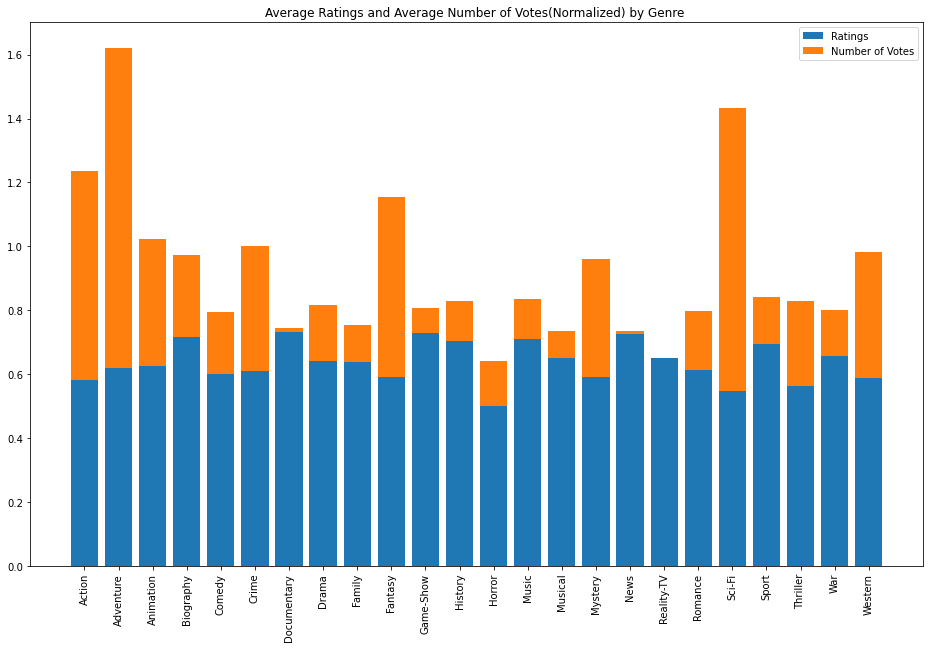

In [96]:
plt.figure(figsize=(16,10))
genre_rating=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['averagerating'])
genre_votes=plt.bar(new_title_and_ratings_df.index,new_title_and_ratings_df['numvotes'],bottom=new_title_and_ratings_df['averagerating'])
plt.title('Average Ratings and Average Number of Votes(Normalized) by Genre ')
plt.legend((genre_rating[0], genre_votes[0]), ('Ratings', 'Number of Votes'))
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0,1.7,0.2))
plt.show()

#Note that as mentioned above, because some movies have multiple genres, the number of votes and ratings were repeated

In [59]:
new_rt_info_df.head()

,id,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000,108 minutes
6,10,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915,82 minutes
7,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114,123 minutes
8,14,R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904,117 minutes
15,22,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869,108 minutes
...,...,...,...,...,...,...,...,...,...,...
1541,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935,119 minutes
1542,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189,129 minutes
1545,1985,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,59371,98 minutes
1546,1986,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,794306,97 minutes


In [10]:
genre_boxoffice_df=new_rt_info_df.genre.str.split('|').apply(pd.Series)
genre_boxoffice_df.index= new_rt_info_df.set_index(['rating','box_office']).index
genre_boxoffice_df=genre_boxoffice_df.stack().reset_index(['rating','box_office'])
genre_boxoffice_df=genre_boxoffice_df.reset_index()
genre_boxoffice_df=genre_boxoffice_df.rename(columns={0:'genre'})
genre_boxoffice_df=genre_boxoffice_df.drop(columns=['index'])
genre_boxoffice_table=genre_boxoffice_df.groupby(['genre']).mean()#,'rating'])#['box_office']


In [34]:
genre_boxoffice_table

,box_office
genre,
Action and Adventure,6.232875e+07
Animation,5.619246e+07
Art House and International,2.222098e+06
Classics,6.750000e+06
Comedy,4.191096e+07
Cult Movies,1.390000e+07
Documentary,1.185648e+07
Drama,2.825376e+07
Faith and Spirituality,5.380785e+06


In [57]:
rating_boxoffice_df=genre_boxoffice_df.groupby(['rating']).mean()

In [58]:
rating_boxoffice_df #shows pg-13 movies generate the most box office revenue on average

,box_office
rating,
G,3.808638e+07
NC17,1.260219e+06
NR,1.491800e+06
PG,4.969769e+07
PG-13,6.057729e+07
R,2.088865e+07


[Text(0.5, 0, 'Genres'), Text(0, 0.5, 'Box Office Revenue (in $10 millions)')]

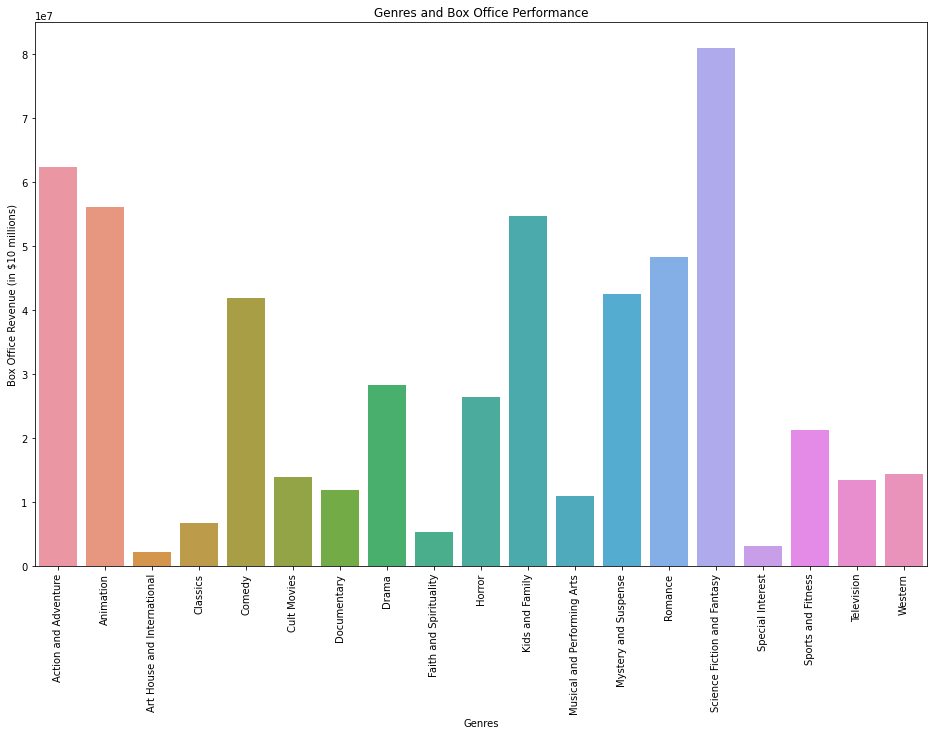

In [39]:
plt.figure(figsize=(16,10))
plt.title('Genres and Box Office Performance')
plt.xticks(rotation='vertical')
sns.barplot(data=genre_boxoffice_df,x=genre_boxoffice_table.index,y=genre_boxoffice_table['box_office']).set(xlabel='Genres',ylabel='Box Office Revenue (in $10 millions)')

<AxesSubplot:title={'center':'Number of Movies per Rating'}, xlabel='Rating', ylabel='Count'>

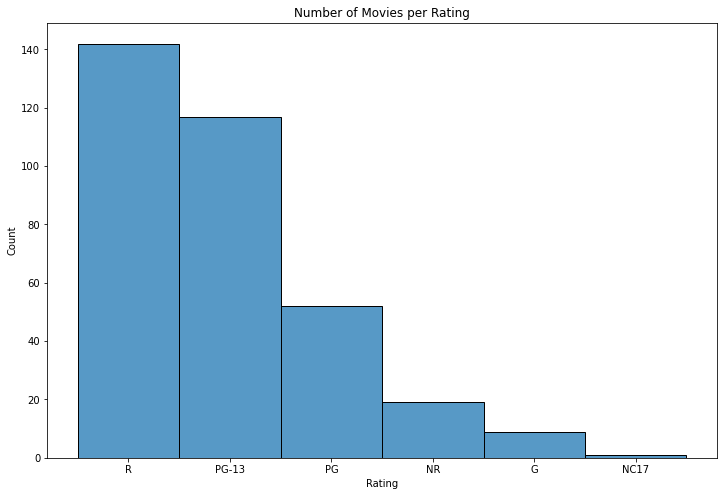

In [13]:
plt.figure(figsize=(12,8))
plt.title('Number of Movies per Rating')
plt.xlabel('Rating')
sns.histplot(data=new_rt_info_df,x=new_rt_info_df['rating'],stat='count')

[Text(0.5, 0, 'Motion Picture Association Rating'),
 Text(0, 0.5, 'Box Office Revenue (in $10 millions)')]

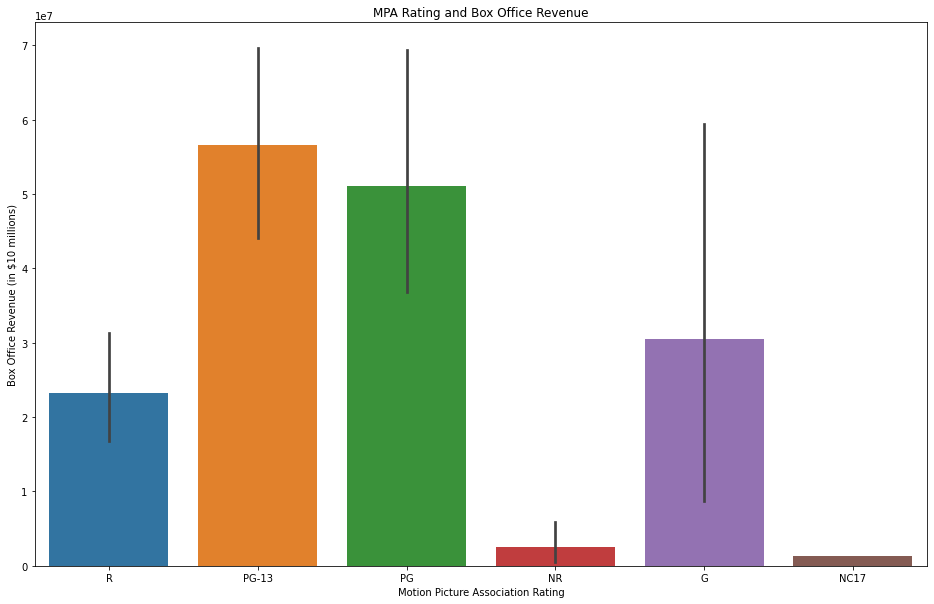

In [42]:
plt.figure(figsize=(16,10))
plt.title('MPA Rating and Box Office Revenue')
sns.barplot(data=new_rt_info_df,x=new_rt_info_df['rating'],y=new_rt_info_df['box_office']).set(xlabel='Motion Picture Association Rating',ylabel='Box Office Revenue (in $10 millions)')

In [17]:
tn_movie_budgets_df['production_budget']=tn_movie_budgets_df['production_budget'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['domestic_gross']=tn_movie_budgets_df['domestic_gross'].str.replace('$','').str.replace(',','').astype('int64')
tn_movie_budgets_df['worldwide_gross']=tn_movie_budgets_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype('int64')
# changing production budget, domestic gross, and worldwide gross from str to float to use for xticks and yticks
# in the scatter plot

# for some reason making the series above into type int64 or float64 makes the graphs different.

In [40]:
tn_movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [26]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


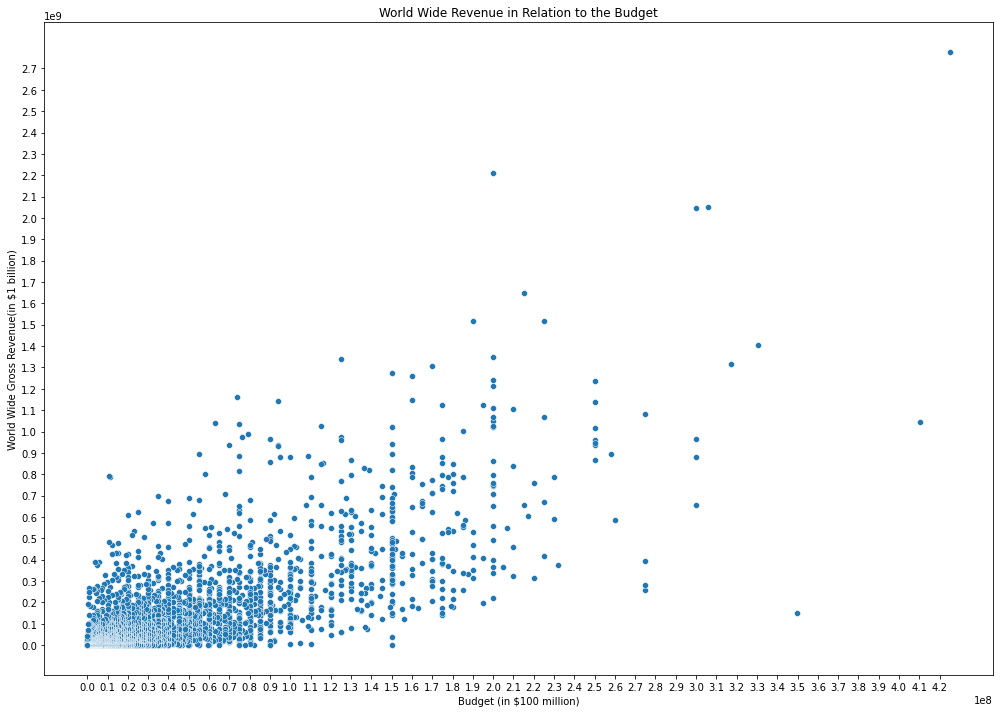

In [53]:
plt.figure(figsize=(17,12))
plt.title('World Wide Revenue in Relation to the Budget')
plt.xlabel('Budget (in $100 million)')
plt.ylabel('World Wide Gross Revenue(in $1 billion)')
plt.xticks(np.arange(min(tn_movie_budgets_df['production_budget']),max(tn_movie_budgets_df['production_budget']),10000000))
plt.yticks(np.arange(min(tn_movie_budgets_df['worldwide_gross']),max(tn_movie_budgets_df['worldwide_gross']),100000000))
sns.scatterplot(x=tn_movie_budgets_df['production_budget'],y=tn_movie_budgets_df['worldwide_gross'])#,s=55, cmap=cmap, norm=norm)
plt.show()

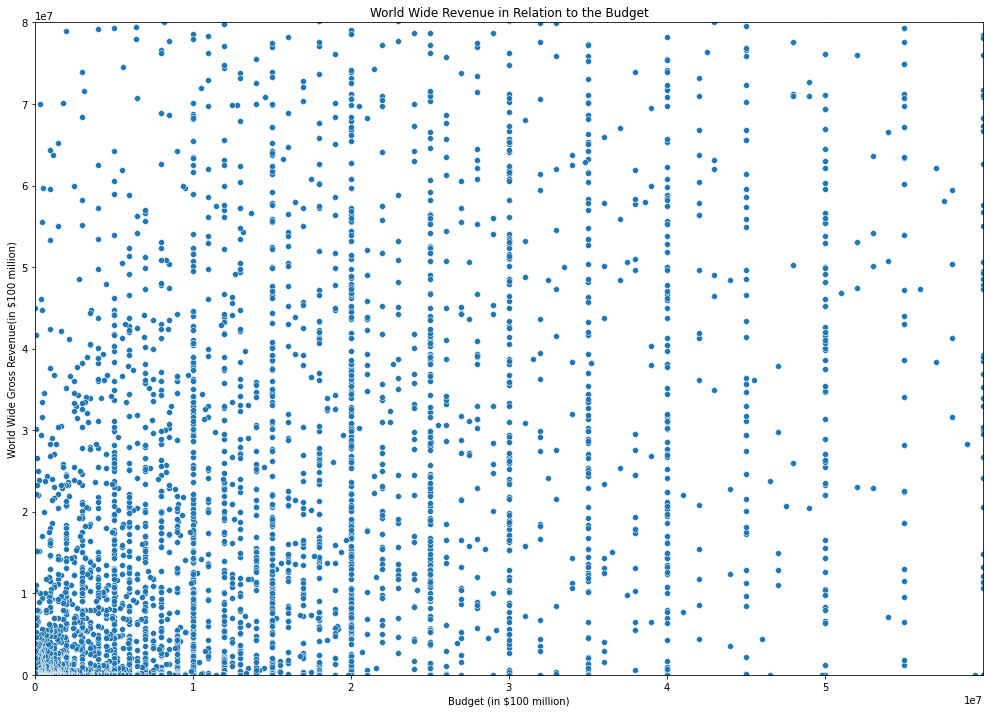

In [55]:
#zoomed in version
plt.figure(figsize=(17,12))
plt.title('World Wide Revenue in Relation to the Budget')
plt.xlabel('Budget (in $100 million)')
plt.ylabel('World Wide Gross Revenue(in $100 million)')
plt.xticks(np.arange(min(tn_movie_budgets_df['production_budget']),max(tn_movie_budgets_df['production_budget']),10000000))
plt.yticks(np.arange(min(tn_movie_budgets_df['worldwide_gross']),max(tn_movie_budgets_df['worldwide_gross']),10000000))
plt.xlim([0,60000000]) #use ylim to create bounds (basically zoomed in)
plt.ylim([0,80000000])
sns.scatterplot(x=tn_movie_budgets_df['production_budget'],y=tn_movie_budgets_df['worldwide_gross'])
plt.show()